<a href="https://colab.research.google.com/github/sabnadk/PCVK_Ganjil_2023/blob/main/week3_Sabna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sabna Devi Kumalasari / 2141720009

## MODUL 3 – Operasi Citra Sederhana – Linier Brightness, Contrast, *Inverse*, Logarithmic Brightness, dan Grayscale Image


### Praktikum

2. akses folder images pada Google Drive Anda dengan kode berikut:

In [1]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


3. Transformasi Linier Brightness

Mengubah tingkat kecerahan citra
---------------------------------
Masukkan nilai kecerahan: 50


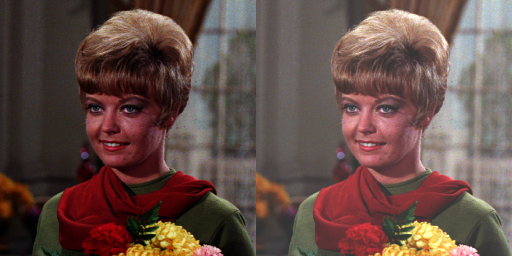

In [3]:
print('Mengubah tingkat kecerahan citra')
print('---------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

### TUGAS PRAKTIKUM

1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang
terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:


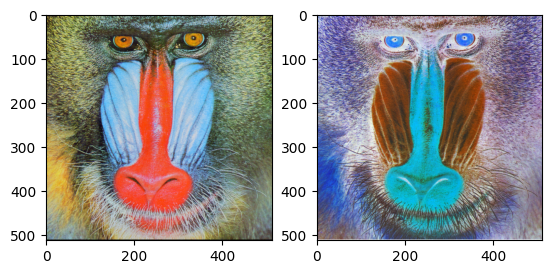

In [7]:
img = cv.imread("/content/drive/MyDrive/KULIAH/Semester 5/PCVK/Images/mandrill.tiff")
img_asli = cv.cvtColor(img,cv.COLOR_BGR2RGB)
img_inverse = 255 - img_asli

fig, ax = plt.subplots(1,2)
ax[0].imshow(img_asli)
ax[1].imshow(img_inverse)

2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan
formula yang terdapat pada bagian Ulasan Teori untuk kontras, sehingga
menghasilkan keluaran seperti berikut:

 Mengubah kontras dan tingkat kecerahan citra 
----------------------------------------------
Masukan tingkat kecerahan [-255 - 255]:50
Masukkan kontras [1.0 - 3.0]:2


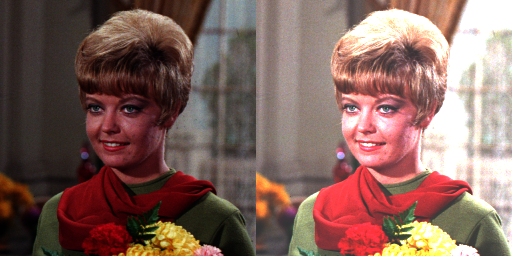

In [8]:
print(' Mengubah kontras dan tingkat kecerahan citra ')
print('----------------------------------------------')

try:
  brightness = int(input('Masukan tingkat kecerahan [-255 - 255]:'))
  contrast = float(input('Masukkan kontras [1.0 - 3.0]:'))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/Images/female.tiff')
contrast_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      contrast_image[y,x,c] = np.clip(contrast*original[y,x,c] + brightness, 0, 255)

final_frame = cv.hconcat((original, contrast_image))
cv2_imshow(final_frame)

3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory
menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi
log, sehingga menghasilkan keluaran seperti berikut:

 Mengubah tingkat kecerahan citra dengan Transformasi Log
----------------------------------------------
Masukkan nilai kecerahan:50


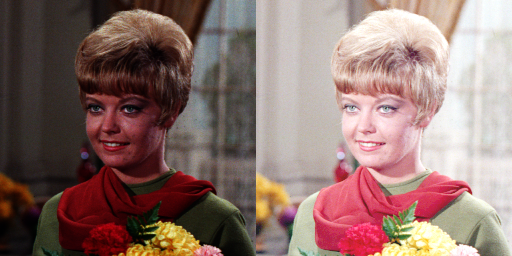

In [9]:
print(' Mengubah tingkat kecerahan citra dengan Transformasi Log')
print('----------------------------------------------')

try:
  brightness = int(input('Masukkan nilai kecerahan:'))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(brightness*  (np.log(1 + original[y,x,c])), 0 , 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness,
dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada
bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

  a. Averaging

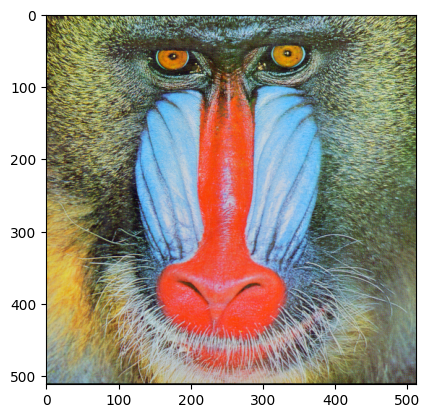

In [10]:
img = cv.imread('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/Images/mandrill.tiff')
img_rgb = cv.cvtColor(img,cv.COLOR_BGR2RGB) # konversi channel BGR -> RGB
plt.imshow(img_rgb)

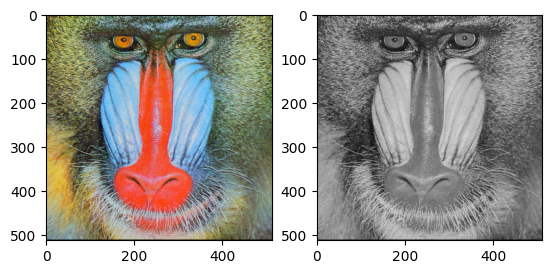

In [11]:
# a. averaging
img_avg = cv.imread('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/Images/mandrill.tiff')
img_avg[:] = img_avg.mean(axis=-1, keepdims=1)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(img_avg)

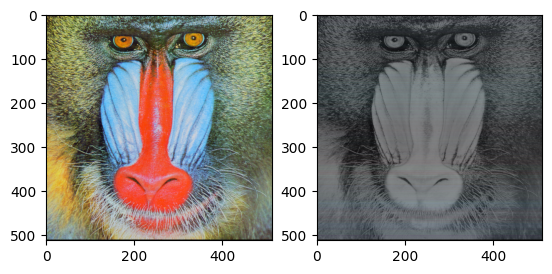

In [12]:
# b. Lightness

img_light = cv.imread('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/Images/mandrill.tiff')
img_light[:] = np.max(img_light, axis=-1, keepdims=100)/2 + np.min(img_light, axis=-2, keepdims=100)/3
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(img_light)

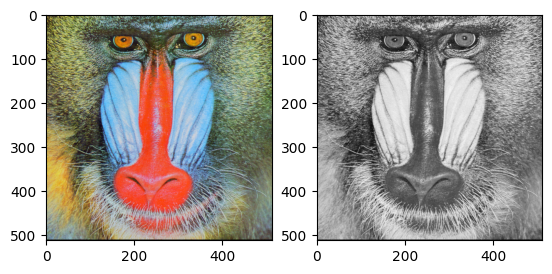

In [13]:
# c. Luminance
img_lum = cv.imread('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/Images/mandrill.tiff')
R, G, B = img_lum[: , : , 0], img_lum[: , : , 1], img_lum[: , : , 2]
gray_img_lum = (0.24 * R) + (0.77 * G) + (0.06 * B)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(gray_img_lum, cmap = 'gray')

5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal,
tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna
biru menjadi grayscale seperti pada contoh berikut:

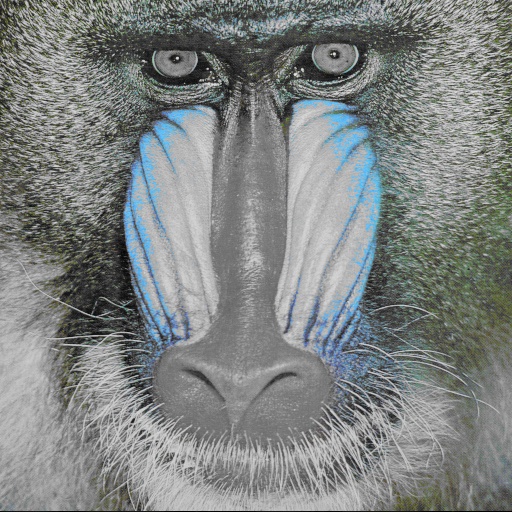

In [51]:
image = cv.imread('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/Images/mandrill.tiff')

# Tentukan batas warna biru dalam format BGR (Blue, Green, Red)
lower_blue = np.array([0, 80, 80])
upper_blue = np.array([250, 200, 110])

# Dapatkan dimensi citra
height, width, channels = image.shape

# Buat citra grayscale
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Inisialisasi citra hasil
final_result = np.zeros_like(image)

# Perulangan untuk mengiterasi melalui semua piksel citra
for y in range(height):
    for x in range(width):
        # Dapatkan nilai warna BGR piksel saat ini
        pixel = image[y, x]

        # Periksa apakah piksel saat ini berada dalam batas warna biru
        if (pixel >= lower_blue).all() and (pixel <= upper_blue).all():
            final_result[y, x] = image[y, x]  # Biarkan piksel biru tetap seperti aslinya
        else:
            final_result[y, x] = [gray[y, x], gray[y, x], gray[y, x]]  # Ubah bagian non-biru menjadi grayscale

# Tampilkan citra hasil
cv2_imshow(final_result)
cv.waitKey(0)
cv.destroyAllWindows()

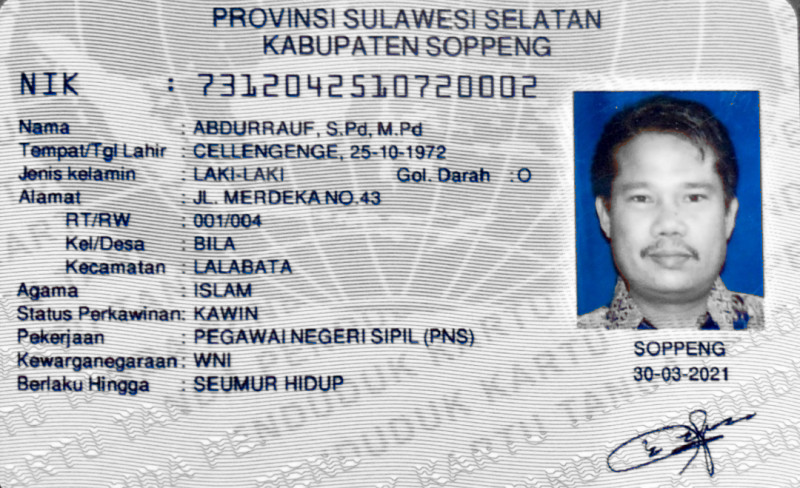

In [30]:
image = cv.imread('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/Images/KTP.jpeg')

# Tentukan batas warna biru dalam format BGR (Blue, Green, Red)
lower_blue = np.array([0, 0, 0])
upper_blue = np.array([255, 100, 100])

# Dapatkan dimensi citra
height, width, channels = image.shape

# Buat citra grayscale
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Inisialisasi citra hasil
final_result = np.zeros_like(image)

# Perulangan untuk mengiterasi melalui semua piksel citra
for y in range(height):
    for x in range(width):
        # Dapatkan nilai warna BGR piksel saat ini
        pixel = image[y, x]

        # Periksa apakah piksel saat ini berada dalam batas warna biru
        if (pixel >= lower_blue).all() and (pixel <= upper_blue).all():
            final_result[y, x] = image[y, x]  # Biarkan piksel biru tetap seperti aslinya
        else:
            final_result[y, x] = [gray[y, x], gray[y, x], gray[y, x]]  # Ubah bagian non-biru menjadi grayscale

# Tampilkan citra hasil
cv2_imshow(final_result)
cv.waitKey(0)
cv.destroyAllWindows()